<p style="font-family: Arial; font-size:2.2em;color:blue; font-style:bold"><br>
Анализ рынка образовательных онлайн платформ
</p><br>

Целью данного анализа является изучение и выявление наиболее востребованных продуктов на рынке образовательных <br>
онлайн курсов, а также ее основной аудитории. 

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Данных в основе анализа
</p><br>

Для изучения основных трендов будет взят опрос, проведенный среди пользователей популярной международной платформы<br> 
freeCodecamp(https://www.freecodecamp.org/) размещенный на репризитории GitHib(https://github.com/freeCodeCamp/2017-new-coder-survey).<br>
Данные содержат в себе информацию о 18000 пользователй разного возраста и происхождения<br>

In [57]:
# импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
# загрузим данные через прямую ссылку на сет
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
data = pd.read_csv(direct_link, low_memory = 0) 

# и посмотрим на ее размер
print(data.shape)
pd.options.display.max_columns = 150
data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

В сэте имеется около 136 признаков, большинство из которых являюся малоинформативными, однако для анализа потребуются<br>
только часть из них, содержащие в себе данные о возрасте,поле,страны происхождения и интересов

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Анализ интересов пользователей
</p><br>

Колонка **'JobRoleInterest'** содержит в себе данные о позиции на которой хотел бы работать каждый опрошенный,<br>
поэтому на основе этого можно предположить какие онлайн курсы предпочтет изучать пользователь.<br><br>
Посмотрим на таблицу распределения<br>

In [3]:
data['JobRoleInterest'].value_counts()[:15]

Full-Stack Web Developer                                                       823
  Front-End Web Developer                                                      450
  Data Scientist                                                               152
Back-End Web Developer                                                         142
  Mobile Developer                                                             117
Game Developer                                                                 114
Information Security                                                            92
Full-Stack Web Developer,   Front-End Web Developer                             64
  Front-End Web Developer, Full-Stack Web Developer                             56
  Product Manager                                                               55
Data Engineer                                                                   53
  User Experience Designer                                                      52
  Us

Как видно из таблицы распределения, большая часть опрошенных заинтересованны в веб-разработке **(Full-Stack Web Developer,<br>
Front-End Web Developer,Back-End Web Developer)** и разработке мобильных приложений.<br><br>
С другой стороны многие имеет сразу несколько областей интереса, поэтому было бы полезно получить более полное представление<br> о том, сколько людей интересуется одним предметом и сколько людей имеют смешанные интересы.<br><br>
Для этого посчитаем количество интересов для каждого пользователя и поотрим на таблицу распределения.

In [4]:
#Избавляемся от пропусков и Разделяем каждую строку по запятой
interests_no_nulls = data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Для каждого пользователя возвращаем количество областей в которых он заинтересован
n_of_options = splitted_interests.apply(lambda x: len(x)) 
# Считаем распределение для всех значений и переводим в процентные доли 
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Как видно из распределения только **30\%** пользователей имеют ясное представление о том, в какой сфере ИТ <br>они хотели бы развиваться, откуда можно сделать вывод, что востребованно предоставлять сразу несколько разных курсов.<br><br>
Далее подробнее изучим спрос на популярные направления веб и мобильной разработки.<br>
Посмотрим какое количество пользователей заинтересованно в одном из них.<br>


True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


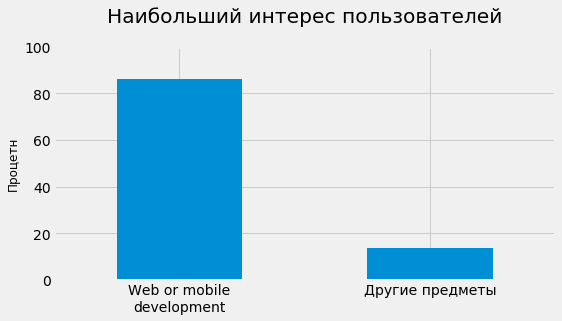

In [6]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer') # возвращает булевой массив
freq_table = web_or_mobile.value_counts(normalize = True) * 100 # строим таблицу распределения
print(freq_table)

# и визуализируем ее
plt.style.use('fivethirtyeight') # используем стиль графиков сайта fivethirtyeight.com
plt.figure(figsize=(8,4))
freq_table.plot.bar()
plt.title('Наибольший интерес пользователей',y = 1.08) 
plt.ylabel('Процетн', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Другие предметы'], rotation = 0) # вместо значений True и False
plt.ylim([0,100])
plt.show()

Из распределения видно, что около **86 %** пользователей заинтересованно либо в веб, либо мобильной разработке,<br>
что дает четкое представление какие курсы необходимо развивать в первую очередь.

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Страна происхождения пользователей
</p><br>

Колонка **'CountryLive'** содержит информацию о странах, в которых живут пользователи.<br>
Так как каждую страну можно рассматривать как отдельный рынок, то полезно будет посмотреть на распределение<br> пользователей по
странам.

In [7]:
# рассмотрим только пользователей, указавших область интереса
data_no_null = data[data['JobRoleInterest'].notnull()]

#рассчитаем сразу абсолютную и относительную плотность
absolute_frequency = data_no_null['CountryLive'].value_counts()
relative_frequency = data_no_null['CountryLive'].value_counts(normalize=True) * 100

# и оформим результаты в один фрейм,для наглядности
country_freq = pd.DataFrame(data = {'Абсолютное распределение':absolute_frequency,\
                                    'Относительное распределение':relative_frequency})

In [8]:
country_freq

,Абсолютное распределение,Относительное распределение
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Nicaragua,1,0.014624
Guadeloupe,1,0.014624
Trinidad & Tobago,1,0.014624
Channel Islands,1,0.014624


В соответствии с таблицей **45,7%**  пользователей находятся в **США**, и это определенно делает ее главным рынком.<br>
Далее идет **Индия**, но это всего лишь **7,7%**, что не так уж далеко от **Великобритании (4,6%)** или **Канады (3,8%)**.

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Средние затраты на обучение
</p><br>

После того как мы определились с основными региональнами направлениями, необходимо более подробно их изучить,<br>
с точки зрения затрат на обучения.<br><br>
Колонка **MoneyForLearning** содержит в американских долларах сумму денег, потраченную участниками с момента, когда они начали заниматься,<br> до момента, когда они завершили опрос. <br>С помощью колонки **MonthsProgramming** можно определить сколько
в среднем каждый пользователь тратил в месяц.

In [11]:
# В колонке 'MonthsProgramming' заменим все 0 на 1, чтобы избежать деления на 0
data_no_null['MonthsProgramming'].replace(0,1,inplace=True)

# Заведем новую колонку 'pays_per month', описывающую среднемесячную сумму затрат
data_no_null['pays_per month'] = data_no_null['MoneyForLearning']/data_no_null['MonthsProgramming']

# Сгруппируем данные по страннам и посчитаем среднее значение 'pays_per month' в каждой
countries_mean = data_no_null.groupby('CountryLive').mean()

# отберем, только интересующие нас страны
countries_mean['pays_per month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: pays_per month, dtype: float64

Как видно из распределения пользователи из **США** ожидаемо в среднем тратят больше чем из других стран.<br>
Однако показатель для **Индии** значительно выше чем в Великобритании, что из-за социально-экономических причин кажется
неправдоподобным.<br><br>Такое расхождение может быть связано с выбросами в значениях по **Индии**, поэтому<br>
хорошей идеей здесь сравнить распределения с помощью **box plot**.

<p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Устранение выбросов
</p><br>

Исследуем переменную **pays_per month** с помошью бокс плота

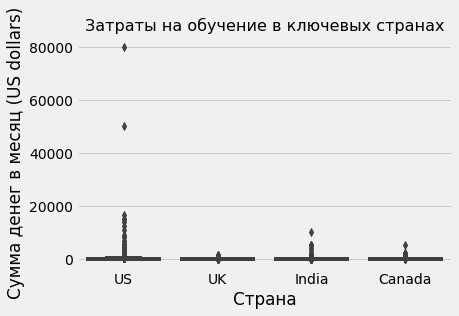

In [16]:
# удалим отсутствующие значения в колонке о происхождении
data_no_null = data_no_null[data_no_null['CountryLive'].notnull()]

# Отберем только 4 интересующие нас страны
only_4 = data_no_null[data_no_null['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
#only_4 = only_4[only_4['pays_per_month'].notnull()]
#only_4 = only_4[only_4['CountryLive'].notnull()]
# Инициируем график бокс плот
sns.boxplot(y = 'pays_per month', x = 'CountryLive',
            data = only_4)
plt.title('Затраты на обучение в ключевых странах',
         fontsize = 16)
plt.ylabel('Сумма денег в месяц (US dollars)')
plt.xlabel('Страна')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

Судя по графику в данных по **США** имеются два существенных выброса, которые влияют на среднею сумму по этой стране.<br>
Поэтому отберем, только те значения, которые меньше чем **20000** :

In [17]:
data_no_null = data_no_null[data_no_null['pays_per month'] < 20000]

In [18]:
#Пересчитаем среднее значение по странам
countries_mean = data_no_null.groupby('CountryLive').mean()
countries_mean['pays_per month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: pays_per month, dtype: float64

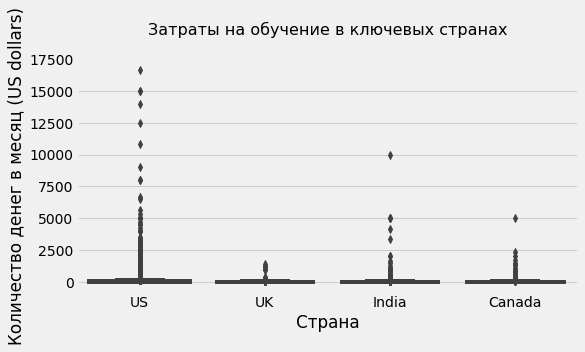

In [31]:
# И снова сравним распределение box plot
only_4 = data_no_null[data_no_null['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
plt.figure(figsize=(8,4))
sns.boxplot(y = 'pays_per month', x = 'CountryLive',
            data = only_4)
plt.title('Затраты на обучение в ключевых странах',
         fontsize = 16, y=1.08)
plt.ylabel('Количество денег в месяц (US dollars)')
plt.xlabel('Страна')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

В данных еще остается большое количество выбросов, поэтому для получения более точной картины,<br> стоит удалить выбросы для каждой страны

In [32]:
# Для Индии

india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['pays_per month'] >= 2500)]
only_4 = only_4.drop(india_outliers.index) # удаляем по индексу

In [33]:
#Для США

us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['pays_per month'] >= 6000)]
only_4 = only_4.drop(us_outliers.index)

In [34]:
# Для Канады

canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['pays_per month'] > 4500)]
only_4 = only_4.drop(canada_outliers.index)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: pays_per month, dtype: float64


([<matplotlib.axis.XTick at 0x288f7672048>,
 <a list of 4 Text xticklabel objects>)

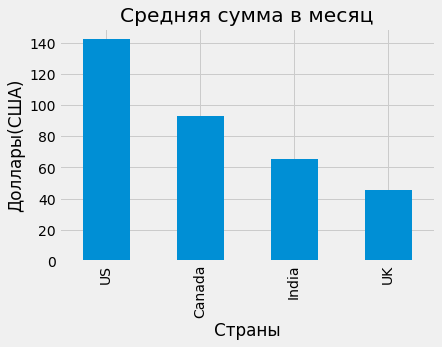

In [48]:
#Снова пересчитаем среднее значение по странам
countries_4_mean = only_4.groupby('CountryLive').mean()
print(countries_4_mean['pays_per month'].sort_values(ascending=False))
countries_4_mean['pays_per month'].sort_values(ascending=False).plot.bar()
plt.xlabel('Страны')
plt.title('Средняя сумма в месяц')
plt.ylabel('Доллары(США)')
plt.xticks(range(4), ['US', 'Canada', 'India', 'UK'])

Как и предполагалось, после удаления выбросов среднее значение по **Индии** значительно уменьшилось,по сравнению с **Канадой**, <br>
однако ее значение все же осталось выше чем в **Британии**.

 <p style="font-family: Arial; font-size:2em;color:blue; font-style:bold"><br>
Анализ возраста и гендерного состава 
</p><br>

Для дальшейшего анализа рынка сравним гендерный состав 4х стран

Text(0.5, 1.0, 'Распределение по половому признаку')

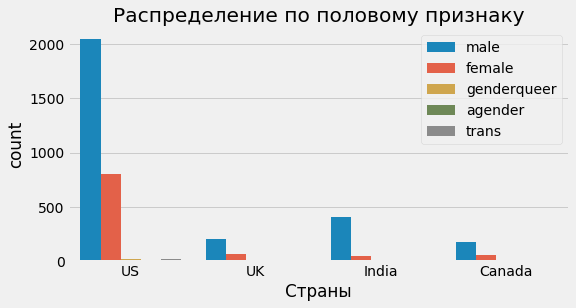

In [54]:
plt.figure(figsize=(8,4))
sns.countplot(x='CountryLive', hue='Gender',data=only_4)
plt.legend(loc='upper right')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Страны')
plt.title('Распределение по половому признаку')

Из графика распределений видно, что во всех странах подавляющая часть пользователей относится к мужскому полу.<br>
Однако в **США** женская половина состовляет целую треть от мужского.<br>
Теперь сравним возраст пользователей в разных странах<br>

No handles with labels found to put in legend.


Text(0, 0.5, 'Возраст')

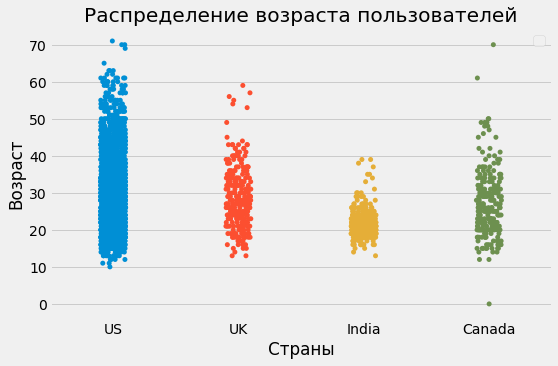

In [56]:
# Воспользуемся распределением stripplot для этого

plt.figure(figsize=(8,5))
sns.stripplot(x='CountryLive', y='Age',data=only_4, jitter = True)
plt.legend(loc='upper right')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Страны')
plt.title('Распределение возраста пользователей')
plt.ylabel('Возраст')

Из графика распределения следует, что самая молодая аудитория находится в **Индии(15-30 лет)**, в то время как в **США** этот
показатель значительно шире**(10-60 лет)**.

<p style="font-family: Arial; font-size:2.2em;color:blue; font-style:bold"><br>
Вывод
</p><br>

После проведенного анализа можо сделать вывод, что **США** является крупнейшим для развития рынком, с самым большим количеством
пользователем **(45%)** и среднемесячными затратами в районе **140\$** . <br>

Далее идет **Индия(8 \% и 65 \$ )** и **Великобритания(5 % и 45 \$)**, однако среднемесячные затраты в **Канаде**,пользователи
из которой составляют только **4%** от общего, тратят в среднем **90\$** в месяц.<br>

При планировании какой либо бизнес стратегий, стоит учитывать также половой состав,которой преимущество смещен<br> в сторону мужчин
во всех странах и  возраст пользователей,диапазон которого значительно варьируется от страны к стране.<br><br>
Другим немаловажным фактором является то, что веб-разработка остается наиболее востребованным направлением, среди пользователей.